## 결정 트리

### 로지스틱 회귀로 와인 분류하기

In [51]:
import pandas as pd
import numpy as np

In [2]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [3]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [5]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [6]:
data = wine[['alcohol','sugar','pH']].to_numpy()

In [7]:
data

array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [8]:
target = wine['class'].to_numpy()

In [9]:
target

array([0., 0., 0., ..., 1., 1., 1.])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=43)

In [12]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [13]:
train_input

array([[ 9.9 ,  8.6 ,  3.2 ],
       [ 9.4 ,  2.  ,  3.32],
       [10.4 ,  8.5 ,  3.28],
       ...,
       [12.6 ,  3.6 ,  3.42],
       [ 9.1 , 17.95,  3.27],
       [11.6 ,  3.6 ,  3.31]])

In [14]:
test_input

array([[10.4 ,  4.5 ,  3.4 ],
       [12.2 ,  2.4 ,  3.2 ],
       [10.  , 11.2 ,  3.15],
       ...,
       [11.4 ,  1.7 ,  3.15],
       [12.2 ,  5.  ,  3.22],
       [12.5 ,  1.6 ,  3.42]])

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
ss = StandardScaler()

In [17]:
ss.fit(train_input)

StandardScaler()

In [18]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()

In [21]:
lr.fit(train_scaled, train_target)

LogisticRegression()

In [22]:
print(lr.score(train_scaled, train_target))

0.7771791418125842


In [23]:
print(lr.score(test_scaled, test_target))

0.7892307692307692


#### 설명하기 쉬운 모델과 어려운 모델

In [24]:
lr.predict_proba([3, 3, 3])  # 에러!  Expected 2D array, got 1D array instead:

ValueError: Expected 2D array, got 1D array instead:
array=[3 3 3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [25]:
lr.predict_proba([[3, 3, 3]])

array([[0.00144941, 0.99855059]])

In [26]:
lr.predict([[3,3,3]])

array([1.])

In [27]:
my_wine = [[7,1,5],[3,3,3],[10,5,3],[8,25,1],[13,15,4]]

In [28]:
lr.predict(my_wine)

array([1., 1., 1., 1., 1.])

In [29]:
lr.predict_proba(my_wine)

array([[1.92760453e-02, 9.80723955e-01],
       [1.44940581e-03, 9.98550594e-01],
       [1.02722190e-06, 9.99998973e-01],
       [0.00000000e+00, 1.00000000e+00],
       [1.42108547e-14, 1.00000000e+00]])

In [30]:
# 각 컬럼의 가중치(weight)와 절편(bias)을 찍어보자

In [31]:
print('weight값 들', lr.coef_)

weight값 들 [[ 0.5466048   1.7136334  -0.68243783]]


In [32]:
print('절편', lr.intercept_)

절편 [1.80175001]


In [33]:
# 품질분류 = 0.54 * 알콜 + 1.71 * 당도 - 0.68 * 산도 + 1.81

#### 과정이 보여서 설명하기 쉬운 모델 => 결정 트리

### 결정 트리

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [36]:
print(dt.score(train_scaled, train_target))

0.9965364633442371


In [37]:
print(dt.score(test_scaled, test_target))

0.8684615384615385


In [38]:
import matplotlib.pyplot as plt

In [39]:
from sklearn.tree import plot_tree

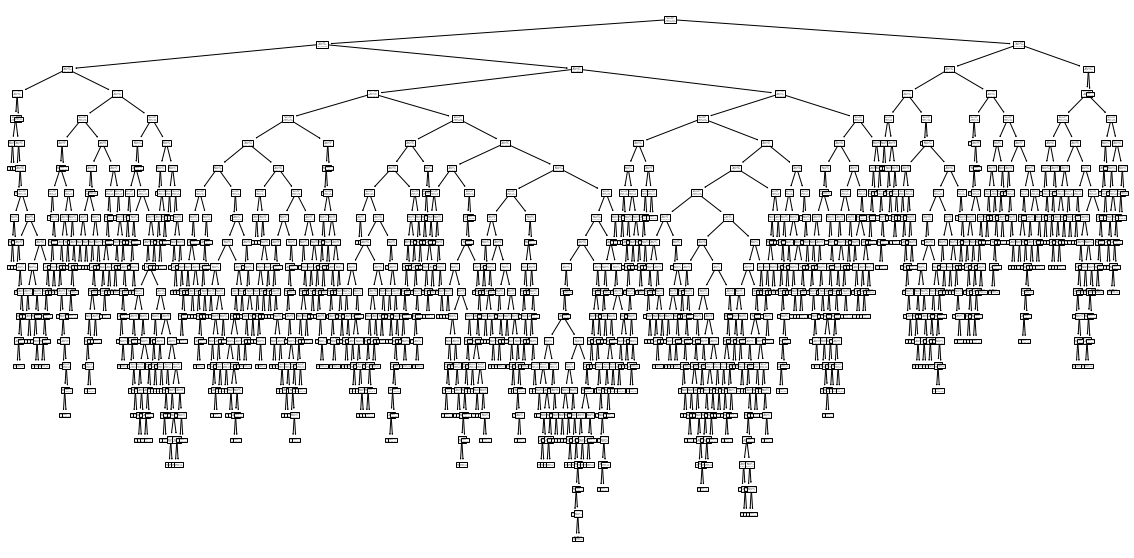

In [40]:
plt.figure(figsize=(20, 10))
plot_tree(dt)
plt.show()

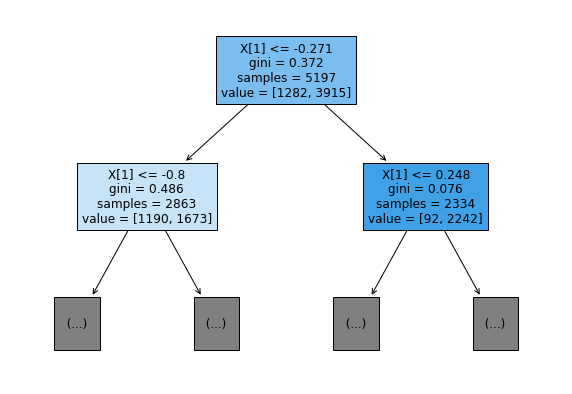

In [41]:
plt.figure(figsize=(10,7))
#plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plot_tree(dt, max_depth=1, filled=True)
plt.show()

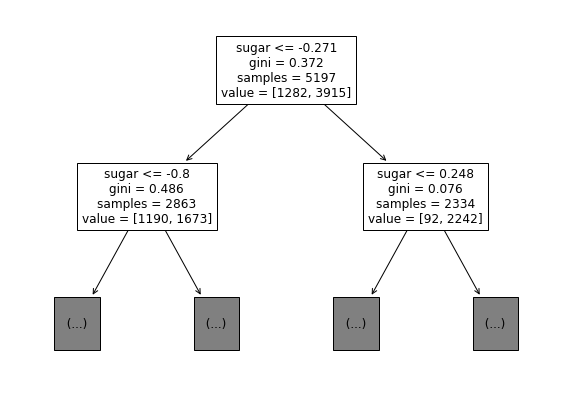

In [42]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, feature_names=['alcohol', 'sugar', 'pH'])
#plot_tree(dt, max_depth=1, filled=True)
plt.show()

#### 가지치기

In [43]:
#dt = DecisionTreeClassifier(max_depth=7, random_state=42)
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [44]:
print(dt.score(train_scaled, train_target))

0.849720992880508


In [45]:
print(dt.score(test_scaled, test_target))

0.8346153846153846


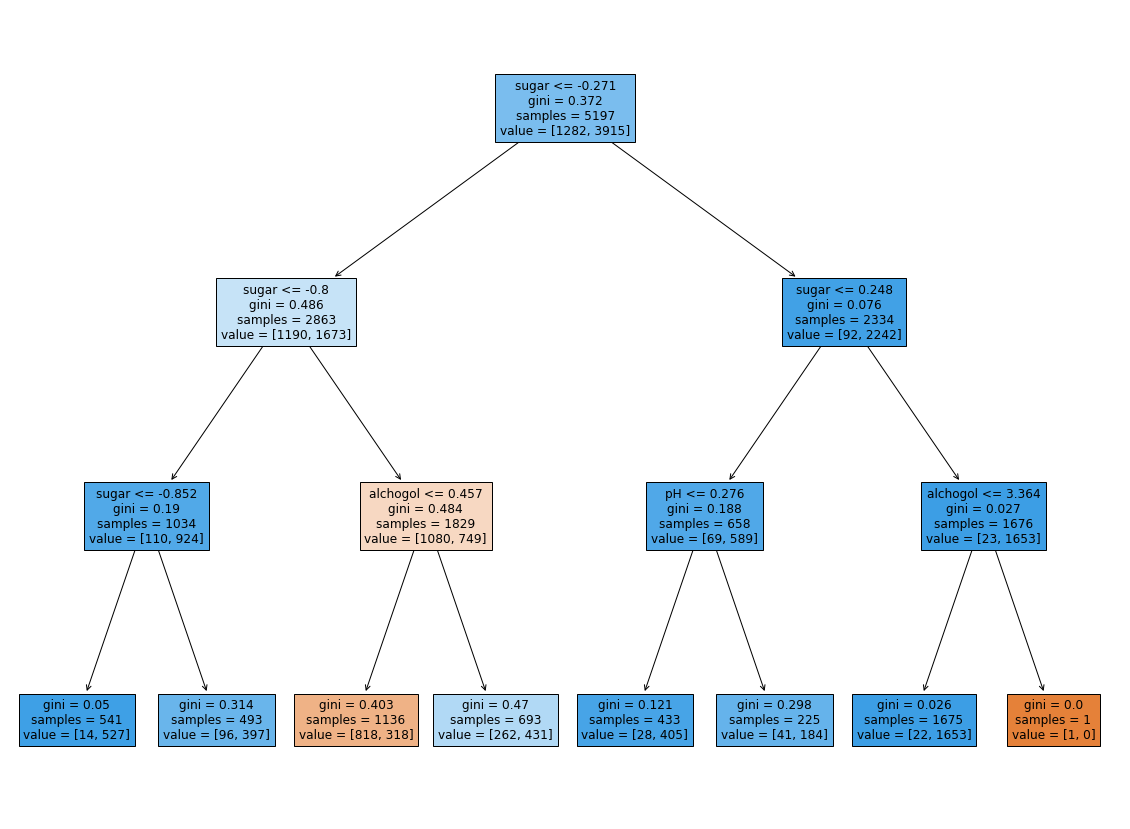

In [46]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alchogol','sugar','pH'])
plt.show()

## RandomForest

In [47]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

In [58]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9970655846527869 0.8916687643444139


In [59]:
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.2261611  0.50913665 0.26470225]


## 엑스트라 트리

In [60]:
from sklearn.ensemble import ExtraTreesClassifier

In [62]:
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

In [63]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9970655846527869 0.8895500481231954


In [64]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.19495642 0.52594143 0.27910216]


## 그라디언트 부스팅

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

In [67]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8873870033600608 0.8689657214777524


In [68]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

In [69]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9433327050358564 0.8780060339083438


In [70]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.16230283 0.69026882 0.14742834]


## 히스토그램 기반 그라디언트 부스팅

In [71]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [72]:
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

In [73]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9311621432141036 0.87916173095432


## Permutation Importance

In [74]:
from sklearn.inspection import permutation_importance

In [75]:
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)

In [76]:
print(result.importances_mean)

[0.09149509 0.24111988 0.08291322]


In [77]:
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)

In [78]:
print(result.importances_mean)

[0.09149509 0.24111988 0.08291322]


In [79]:
hgb.score(test_input, test_target)

0.8838461538461538

## XGVoost vs LightGBM

In [81]:
from xgboost import XGBClassifier

In [82]:
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True, n_jobs=-1)

In [83]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9535309566101002 0.8839714592433554


In [86]:
from lightgbm import LGBMClassifier

In [87]:
lgb = LGBMClassifier(random_state=42)
scroes = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)

In [88]:
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9535309566101002 0.8839714592433554
